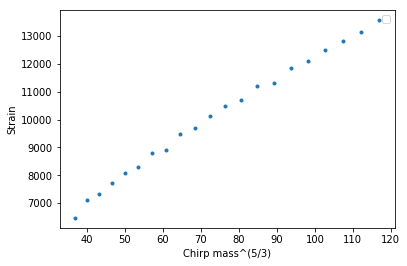

In [7]:
import pylab
from pycbc import waveform
import numpy as np
import matplotlib.pyplot as plt

mass1 = np.linspace(10,20,21) # Mass1 = 10, 10.5, 11, ......, 20
mass2 = mass1 # Mass2 = 10, 10.5, 11, ......, 20

chirp_mass_list = [] # Make a empty list, to collect chirp masses.
h_list = [] # Make a empty list, to collect amplitudes.

#--------------Generating wavefroms depending on the mass lists------------------#
for i in range(len(mass1)):
    for j in range(len(mass2)):
        if mass1[i] == mass2[j]:
            hp, hc = waveform.get_td_waveform(approximant='IMRPhenomPv2',
                                 distance  = 3.2408e-23, #1 meter away
                                 mass1=mass1[i], mass2=mass2[j],
                                 delta_t=1.0/4096,
                                 f_lower=40)
#---------------------------Generating over--------------------------------------#

#--------Collecting the amplitudes and chirp masses to make liner function-------#
            signal_h1 = hp
            signal_h1_array = np.array(signal_h1)
            list_h1 = signal_h1_array.tolist()
            h1_max_index = list_h1.index(max(list_h1))
        
            chirp_mass = (mass1[i] * mass2[j])**(0.6) / (mass1[i] + mass2[j])**(0.2)
            chirp_mass_list.append((chirp_mass**(1.66666667))) # Chirp mass collecting
            h_list.append(signal_h1_array[h1_max_index]) # Amplitude collecting.
#---------------------------------Collecting over---------------------------------#

plt.ylabel('Strain')
plt.xlabel('Chirp mass^(5/3)')
plt.legend()
plt.plot(chirp_mass_list,h_list,'.')